# ***Complete Guide to Generative AI for Data Analysis and Data Science***

---




### **Chapter 13:** *Building Machine Learning Models - Classification*

a) Classification Model - Random Forest Classifier

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/Iris.csv'
df = pd.read_csv(file_path)

# Features and target
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Encode target labels
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



b) Dealing with Missing Values while Building a Classification Model

In [2]:
#Dealing with missing values
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/Iris_Missing.csv'
df = pd.read_csv(file_path)

# Features and target
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Handle missing values (impute with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode target labels
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c) Comparing Multiple Classification Algorithms

In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load the dataset
file_path = '/content/Iris.csv'
df = pd.read_csv(file_path)

# Features and target
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Handle missing values (impute with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode target labels
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Define models to compare
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    results[name] = scores
    print(f"{name} Cross-validation accuracies: {scores}")
    print(f"{name} Mean accuracy: {np.mean(scores):.4f}\n")

# Summary report
print("Summary of Mean Accuracies:")
for name, scores in results.items():
    print(f"{name}: {np.mean(scores):.4f}")

Random Forest Cross-validation accuracies: [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]
Random Forest Mean accuracy: 0.9467



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:43:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:43:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:43:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:43:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:43:10] WARNING: /w

XGBoost Cross-validation accuracies: [0.96666667 0.96666667 0.9        0.96666667 0.9       ]
XGBoost Mean accuracy: 0.9400

Logistic Regression Cross-validation accuracies: [1.         0.96666667 0.9        1.         0.9       ]
Logistic Regression Mean accuracy: 0.9533

Support Vector Machine Cross-validation accuracies: [1.         0.96666667 0.9        1.         0.9       ]
Support Vector Machine Mean accuracy: 0.9533

K-Nearest Neighbors Cross-validation accuracies: [1.         0.96666667 0.9        1.         0.96666667]
K-Nearest Neighbors Mean accuracy: 0.9667

Summary of Mean Accuracies:
Random Forest: 0.9467
XGBoost: 0.9400
Logistic Regression: 0.9533
Support Vector Machine: 0.9533
K-Nearest Neighbors: 0.9667


d) Adding a Single Layer Neural Network

In [6]:
pip install tensorflow

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
df = pd.read_csv("/content/Iris.csv")
X = df.drop(["Id", "Species"], axis=1).values
y = LabelEncoder().fit_transform(df["Species"])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False, random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_scores, xgb_scores, nn_scores = [], [], []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Random Forest
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))

    # XGBoost
    xgb.fit(X_train, y_train)
    xgb_scores.append(xgb.score(X_test, y_test))

    # Neural Network (single hidden layer)
    nn = Sequential([
        Dense(8, input_shape=(X_train.shape[1],), activation="relu"),
        Dense(len(np.unique(y)), activation="softmax")
    ])
    nn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    nn.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    _, acc = nn.evaluate(X_test, y_test, verbose=0)
    nn_scores.append(acc)

# Pretty printing
def print_results(name, scores):
    scores_rounded = [round(s, 3) for s in scores]
    mean_score = round(np.mean(scores), 3)
    print(f"{name} Accuracies (per fold): {scores_rounded}")
    print(f"{name} Mean Accuracy: {mean_score}\n")

print_results("Random Forest", rf_scores)
print_results("XGBoost", xgb_scores)
print_results("Neural Network", nn_scores)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:45:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:45:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object a

Random Forest Accuracies (per fold): [0.967, 0.967, 0.933, 0.967, 0.9]
Random Forest Mean Accuracy: 0.947

XGBoost Accuracies (per fold): [0.967, 0.967, 0.9, 0.967, 0.9]
XGBoost Mean Accuracy: 0.94

Neural Network Accuracies (per fold): [0.833, 0.9, 0.833, 1.0, 0.867]
Neural Network Mean Accuracy: 0.887



e) Classification Using Neural Networks

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
file_path = "/content/Iris_Missing.csv"
df = pd.read_csv(file_path)

# Features and target
X = df.drop(columns=["Id", "Species"]).values
y = df["Species"].values

# Handle missing values (impute with mean)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Build neural network with two dense layers
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation="relu"),
    Dense(8, activation="relu"),
    Dense(len(np.unique(y_encoded)), activation="softmax")
])

# Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0,
                    validation_data=(X_test, y_test))

# Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.3f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.833


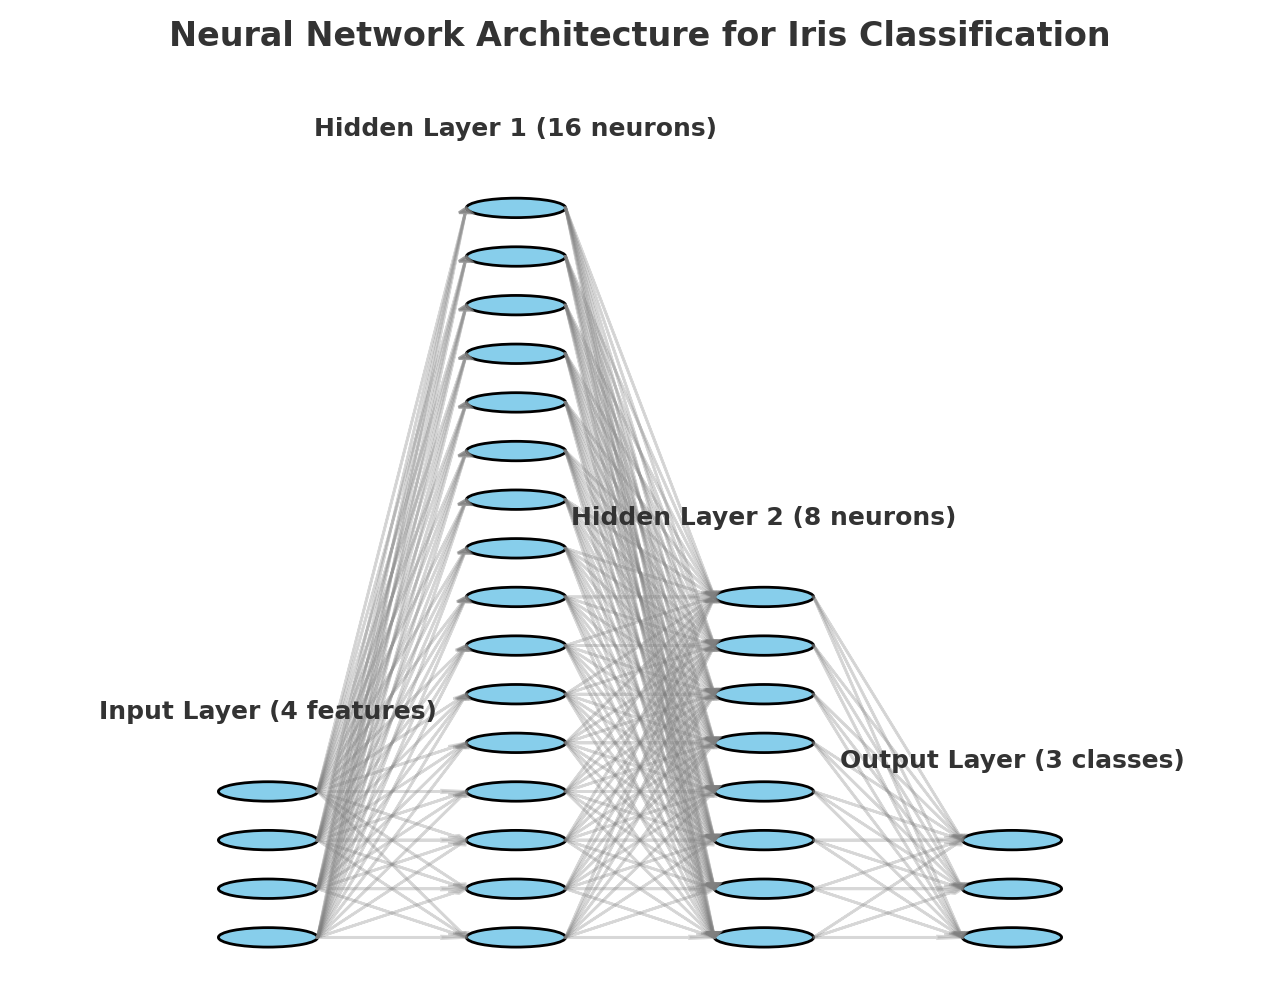

f) Adding more layers and epochs

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv("/content/Iris_Missing.csv")

# Handle missing values (mean imputation for numeric, mode for categorical)
for col in df.columns:
    if df[col].dtype == 'object':  # categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # numeric
        df[col].fillna(df[col].mean(), inplace=True)

# Features and label
X = df.drop(columns=["Id", "Species"]).values
y = df["Species"]

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build neural network (4 layers)
model = Sequential([
    Dense(64, activation="relu", input_dim=X_train.shape[1]),  # Layer 1
    Dense(32, activation="relu"),                              # Layer 2
    Dense(16, activation="relu"),                              # Layer 3
    Dense(3, activation="softmax")                             # Output layer (3 species)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train model for 100 epochs
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=16,
                    verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.3f}")

Epoch 1/100


/tmp/ipython-input-2845338600.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2845338600.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.2382 - loss: 1.1356 - val_accuracy: 0.3667 - val_loss: 1.0448
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4412 - loss: 1.0259 - val_accuracy: 0.7333 - val_loss: 0.9661
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6667 - loss: 0.9380 - val_accuracy: 0.7667 - val_loss: 0.8850
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8019 - loss: 0.8416 - val_accuracy: 0.8000 - val_loss: 0.8030
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8244 - loss: 0.7402 - val_accuracy: 0.7667 - val_loss: 0.7166
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8530 - loss: 0.6465 - val_accuracy: 0.7667 - val_loss: 0.6376
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8362 - loss: 0.5531 - val_accuracy: 0.7333 - val_loss: 0.5704
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8365 - loss: 0.4792 - val_accuracy: 0.7000 - val_loss: 0.5203
Epoc

g) Hyperparameter Tuning - Using Grid Search<br>
GridSearchCV finds the best parameters by cross-validation, then automatically retrains the model on the full training set with those parameters. To measure the true performance, you must still test it on unseen test data.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("/content/Iris_Missing.csv")

# Normalize column names (remove spaces, lowercase)
df.columns = df.columns.str.strip().str.lower()

# Ensure target column exists
if "species" not in df.columns:
    raise KeyError(f"Expected 'Species' column (or 'species'), but found: {df.columns.tolist()}")

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':  # categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # numeric
        df[col].fillna(df[col].mean(), inplace=True)

# Features and target
X = df.drop(columns=["id", "species"]).values
y = df["species"]

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define Random Forest and GridSearch parameters
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="accuracy",
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on test set
y_pred = grid_search.predict(X_test)

# Evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/tmp/ipython-input-545939679.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-545939679.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Test Accuracy: 0.9666666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



h) Feature Importance

Random Forest Accuracy: 0.967

Feature Importances:
         Feature  Importance
2  PetalLengthCm    0.429947
3   PetalWidthCm    0.400001
0  SepalLengthCm    0.112861
1   SepalWidthCm    0.057192


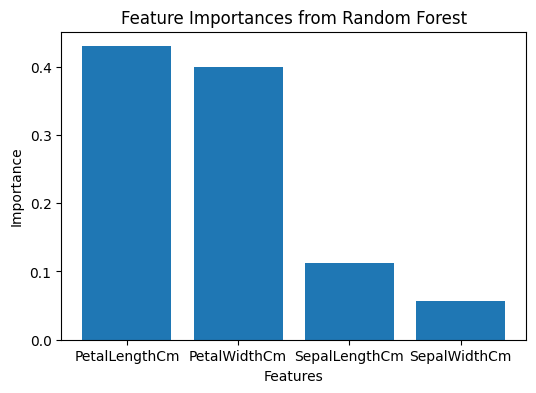

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Iris_Missing.csv")

# Drop the Id column if it exists
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

# Handle missing values (simple imputation with column means for numeric features)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Define features (X) and target (y)
X = df.drop("Species", axis=1)
y = df["Species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.3f}")

# Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Visualization
plt.figure(figsize=(6, 4))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.title("Feature Importances from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

**Challenge: Classification**

1.   Use the consumer intent dataset (likelihood of purchase of an item by the customer).
2.   Review the structure of the dataset.
3.   Create a classification model using Random Forest Classifier.
4.   Modify the script to add two layer neural network.
5.   Compare both models to see which performed better.

===== First 5 Rows =====
   product_id   product_type product_maker  product_cost  buyer_age  \
0        5925        Tablets  Other Brands       1012.11         26   
1        5966  Smart Watches       Samsung       2679.33         64   
2        5888     Headphones         Apple       2486.69         54   
3        5945  Smart Watches       Samsung       1975.58         19   
4        5934     Headphones  Other Brands       1836.62         67   

   buyer_gender  buying_frequency  buyer_satisfaction_score  buying_intent  
0             0                18                         5              0  
1             0                13                         1              0  
2             0                12                         4              1  
3             1                 4                         1              0  
4             0                10                         2              0   

===== Descriptive Statistics =====
         product_id product_type product_maker  p

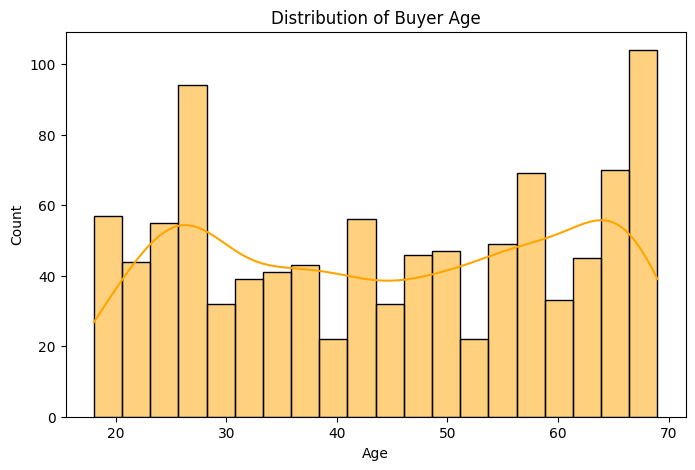

/tmp/ipython-input-1081573993.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="product_type", data=df, palette="Set2")


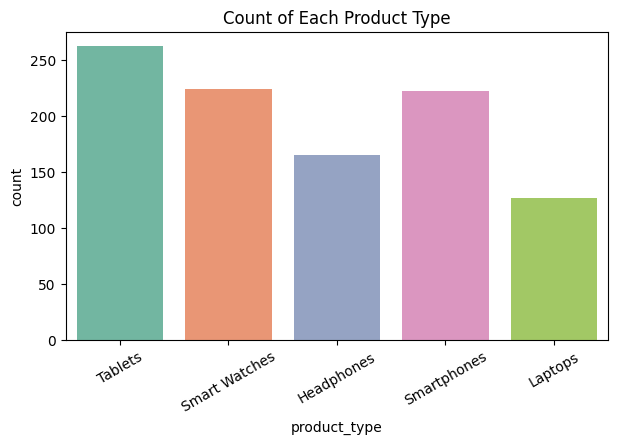

/tmp/ipython-input-1081573993.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="product_maker", data=df, palette="Set3")


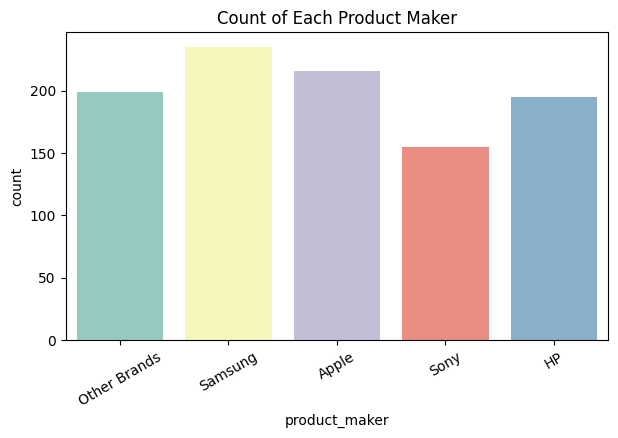

/tmp/ipython-input-1081573993.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="buying_intent", data=df, palette="coolwarm")


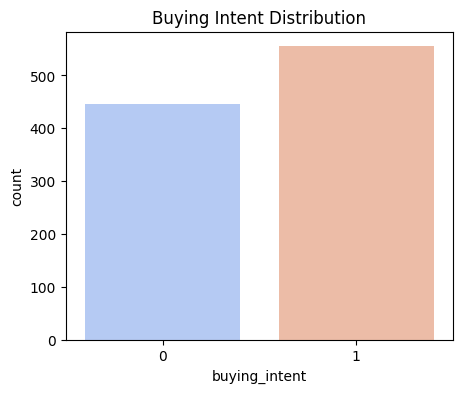

In [13]:
#Importing and Understanding the Data
# --- Install & Import Required Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your uploaded file name
df = pd.read_csv("/content/13_challenge_synthetic_consumer_intent.csv")

# --- Basic Data Exploration ---
print("===== First 5 Rows =====")
print(df.head(), "\n")

print("===== Descriptive Statistics =====")
print(df.describe(include="all"), "\n")

print("===== Missing Values =====")
print(df.isnull().sum(), "\n")

print("Unique Product Types:", df["product_type"].nunique())
print("Unique Product Makers:", df["product_maker"].nunique())

# --- Visualizations ---

# Buyer Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["buyer_age"], kde=True, bins=20, color="orange")
plt.title("Distribution of Buyer Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Product Types Count
plt.figure(figsize=(7,4))
sns.countplot(x="product_type", data=df, palette="Set2")
plt.title("Count of Each Product Type")
plt.xticks(rotation=30)
plt.show()

# Product Makers Count
plt.figure(figsize=(7,4))
sns.countplot(x="product_maker", data=df, palette="Set3")
plt.title("Count of Each Product Maker")
plt.xticks(rotation=30)
plt.show()

# Buying Intent (0 = No, 1 = Yes)
plt.figure(figsize=(5,4))
sns.countplot(x="buying_intent", data=df, palette="coolwarm")
plt.title("Buying Intent Distribution")
plt.show()

In [14]:
#Creating a classifier model using Random Forest Classifier
# --- Random Forest Classifier ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode categorical columns
label_encoders = {}
for col in ["product_type", "product_maker"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features (X) and Target (y)
X_rf = df.drop(columns=["buying_intent", "product_id"])  # drop product_id as it's just an identifier
y_rf = df["buying_intent"]

# Train-test split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf
)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_rf_train, y_rf_train)

# Predictions
y_rf_pred = rf.predict(X_rf_test)

# Evaluation
print("===== Model Evaluation =====")
print("Accuracy:", accuracy_score(y_rf_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_rf_test, y_rf_pred))

===== Model Evaluation =====
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       111

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [15]:
#Using Neural Network
# --- Neural Network Classifier for 'buying_intent' ---

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Features (X) and Target (y)
X_nn = df.drop(columns=["buying_intent", "product_id"])
y_nn = df["buying_intent"]

# Scale numerical features for NN (important for stable training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_nn)

# Train-test split
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(
    X_scaled, y_nn, test_size=0.2, random_state=42, stratify=y_nn
)

# Build Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_nn_train.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),                                   # Second hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer (binary classification)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_nn_train, y_nn_train, validation_data=(X_nn_test, y_nn_test),
                    epochs=20, batch_size=32, verbose=1)

# Evaluate Model
loss, accuracy = model.evaluate(X_nn_test, y_nn_test, verbose=0)
print(f"\nNeural Network Test Accuracy: {accuracy:.4f}")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5332 - loss: 0.6874 - val_accuracy: 0.8100 - val_loss: 0.5489
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8344 - loss: 0.5041 - val_accuracy: 0.9050 - val_loss: 0.4028
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9301 - loss: 0.3568 - val_accuracy: 0.9250 - val_loss: 0.2781
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9619 - loss: 0.2367 - val_accuracy: 0.9800 - val_loss: 0.1932
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9758 - loss: 0.1788 - val_accuracy: 0.9750 - val_loss: 0.1433
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9770 - loss: 0.1343 - val_accuracy: 0.9900 - val_loss: 0.1115
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9873 - loss: 0.1075 - val_accuracy: 0.9900 - val_loss: 0.0946
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9779 - loss: 0.0946 - val_accuracy: 0.9950 - val_loss: 0.0786
Ep

In [16]:
#Comparing results

from sklearn.metrics import classification_report

# 1. Evaluate Random Forest on test set
rf_y_pred = rf.predict(X_rf_test)   # already trained earlier
print("===== Random Forest Evaluation =====")
print("Accuracy:", accuracy_score(y_rf_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_rf_test, rf_y_pred))

# 2. Evaluate Neural Network on test set
nn_y_pred_prob = model.predict(X_nn_test)
nn_y_pred = (nn_y_pred_prob > 0.5).astype(int).reshape(-1)

print("\n===== Neural Network Evaluation =====")
print("Accuracy:", accuracy_score(y_nn_test, nn_y_pred))
print("\nClassification Report:\n", classification_report(y_nn_test, nn_y_pred))

# 3. Quick Comparison
rf_acc = accuracy_score(y_rf_test, rf_y_pred)
nn_acc = accuracy_score(y_nn_test, nn_y_pred)

print("\n===== Model Comparison =====")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Neural Network Accuracy: {nn_acc:.4f}")

if rf_acc > nn_acc:
    print("Random Forest performs better on this dataset.")
elif nn_acc > rf_acc:
    print("Neural Network performs better on this dataset.")
else:
    print("Both models perform equally well.")

===== Random Forest Evaluation =====
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       111

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

===== Neural Network Evaluation =====
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       111

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


===== Model Comparison =====
Random Forest Accuracy: 1.0000
Neural Network Accuracy: 1.0000
Both models perform equally well.
